### Выполнил студент МИВ-221: Айвар Уркунов

# Часть 3. Задача кластеризации

Датасет: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata \
Для представленного датасета необходимо решить задачу кластеризации методом k-средних. При решении задачи необходимо ответить на следующие вопросы:
1. Как выбор начальных центров кластеров влияет на результат кластеризации
2. Какую метрику выбрать для оценки качества кластеризации?

Описание датасета на Kaggle:
    
This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [24]:
# Поресерчим датасет

In [25]:
df = pd.read_csv('CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [26]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [27]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [28]:
# обработаем датасет, заменим пропущенные значения на медианные и масштабируем признаки

In [29]:
# удалим столбец CUST_ID, тк он не несет полезной информации для кластеризации
df.drop('CUST_ID', axis=1, inplace=True)

imputer = SimpleImputer(strategy='median')
df_imputed = imputer.fit_transform(df)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

df_prepared = pd.DataFrame(df_scaled, columns=df.columns)
df_prepared.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


# Применим метод k-means с разными стратегиями инициализации

Определим оптимальное кол-во кластеров

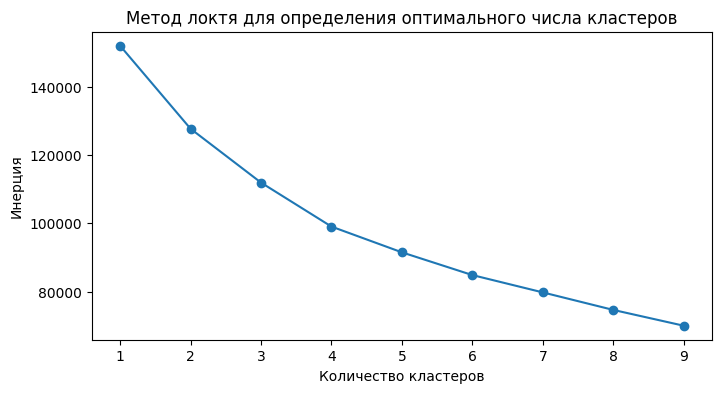

In [31]:
import warnings
warnings.filterwarnings('ignore')

inertia = []
k_values = range(1, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_prepared)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.xticks(k_values)
plt.show()

На основе графика оплимальное кол-во кластеров = 4, тк снижение инерции замедляется после 4 кластеров. Инерция измеряет, насколько внутренне согласованны кластеры, то есть насколько близко данные сгруппированы внутри кластеров.

Применим KMeans

In [34]:
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(df_prepared)

# добавим метки кластера в исходный датафрейм
df['Cluster'] = clusters

print(df.groupby('Cluster').mean())

             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0         894.907458           0.934734  1236.178934        593.974874   
1        4602.449658           0.968389   501.862982        320.188797   
2        3551.153761           0.986879  7681.620098       5095.878826   
3        1012.658327           0.789924   270.041785        209.937299   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    642.478274    210.570626             0.885165   
1                    181.759123   4521.509581             0.287832   
2                   2587.208264    653.638891             0.946418   
3                     60.371441    596.509903             0.170145   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                      

## Как выбор начальных центров кластеров влияет на результат кластеризации

Алгоритм k-средних начинает с выбора начальных центров кластеров (центроидов), и эти начальные центры могут существенно повлиять на конечный результат кластеризации, потому что алгоритм стремится минимизировать сумму квадратов расстояний от точек до центра ближайшего кластера.

- Локальные минимумы: K-means могут "застрять" в локальных минимумах, которые не являются оптимальным разделением данных.
- Сходимость: Разные начальные центроиды могут привести к разной скорости сходимости, а иногда и к различным конечным результатам.
- Стабильность: Некоторые наборы начальных центроидов могут привести к более стабильным кластерам при повторных запусках, в то время как другие могут привести к большей изменчивости.

Для уменьшения этих проблем обычно используются следующие подходы:

- Метод k-средних++: Это улучшение k-средних, которое тщательно выбирает начальные центры, чтобы улучшить сходимость и уменьшить вероятность плохого локального минимума.
- Множественные запуски: Выполнение алгоритма k-средних несколько раз с различными начальными центрами и выбор лучшего результата по инерции.
- Фиксированный seed: Задание одного и того же seed для генератора случайных чисел для воспроизводимости результатов.

In [42]:
num_clusters = 4
results = {}

for seed in range(10):  # проведем 10 запусков с разными случайными начальными точками
    kmeans = KMeans(n_clusters=num_clusters, init='random', n_init=1, random_state=seed)
    clusters = kmeans.fit_predict(df_prepared)
    
    # вычислим инерцию и Silhouette Score для каждого запуска
    inertia = kmeans.inertia_
    silhouette = silhouette_score(df_prepared, clusters)
    
    results[seed] = {'inertia': inertia, 'silhouette': silhouette}

results_df = pd.DataFrame(results).T
results_df

,inertia,silhouette
0,104747.918372,0.166252
1,99062.441080,0.197979
2,103148.507714,0.183961
3,105337.575906,0.165422
4,99061.939842,0.197679
5,106850.484876,0.158238
6,99062.454517,0.197867
7,99062.514482,0.197207
8,99062.379804,0.197302
9,99062.441080,0.197979


In [44]:
# определим запуск с лучшим Silhouette Score
print(f"Лучший запуск по Silhouette Score: {pd.DataFrame(results).T['silhouette'].idxmax()+1}")

Лучший запуск по Silhouette Score: 2


Применим метод k-means++. \
Сравним результаты со случайным выбором начальных центров и k-средних++.

In [45]:
num_clusters = 4
results_plus_plus = {}

kmeans_plus_plus = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, random_state=42)
clusters_plus_plus = kmeans_plus_plus.fit_predict(df_prepared)
inertia_plus_plus = kmeans_plus_plus.inertia_
silhouette_plus_plus = silhouette_score(df_prepared, clusters_plus_plus)

results_plus_plus['k-means++'] = {
    'inertia': inertia_plus_plus,
    'silhouette': silhouette_plus_plus
}

best_random_inertia = results_df.loc[results_df['silhouette'].idxmax(), 'inertia']
best_random_silhouette = results_df.loc[results_df['silhouette'].idxmax(), 'silhouette']

results_plus_plus['best_random'] = {
    'inertia': best_random_inertia,
    'silhouette': best_random_silhouette
}

results_plus_plus_df = pd.DataFrame(results_plus_plus).T
results_plus_plus_df

,inertia,silhouette
k-means++,99061.939842,0.197679
best_random,99062.441080,0.197979


Визуализируем кластеры \
Для этого уменьшим размерность датафрейма \
Для визуализации воспользуемся PCA

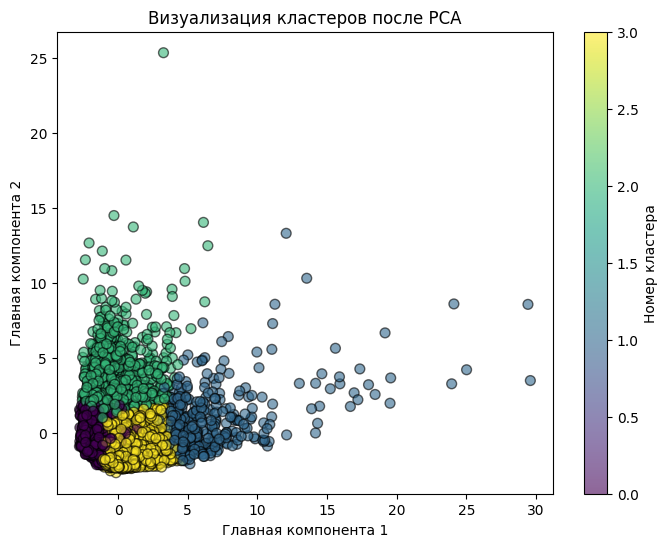

In [51]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_prepared)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters_plus_plus, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)

plt.title('Визуализация кластеров после PCA')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.colorbar(label='Номер кластера')
plt.show()

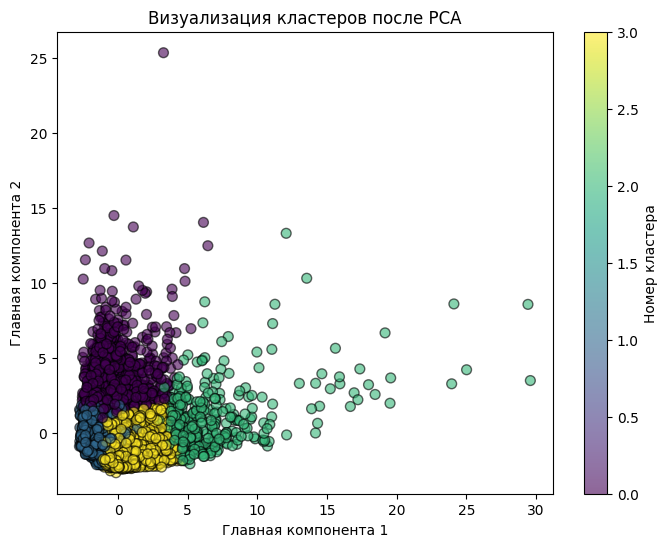

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)

plt.title('Визуализация кластеров после PCA')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.colorbar(label='Номер кластера')
plt.show()

Таким образом, изменение начальных центров кластеров может влиять на метку, которая достанется каждому кластеру. Также в рамках данной задачи может влиять на небольшое изменение формы кластеров. В рамках двух представленных визуализаций это особо незаметно. Также можно отфильтровать выбросы.

# Выбор метрики для оценки качества кластеризации зависит от природы данных и целей кластеризации.

- Инерция (Within-Cluster Sum of Squares, WCSS): Измеряет общее расстояние между точками и их соответствующими центроидами. Низкая инерция указывает на то, что точки данных хорошо сгруппированы.
- Silhouette Score: Измеряет, насколько хорошо отделены кластеры. Значение близкое к +1 указывает на хорошо определенные кластеры, а значение около 0 указывает на перекрывающиеся кластеры.
- Davies-Bouldin Index: Мера сходства между кластерами, где более низкие значения указывают на лучшее разделение кластеров.
- Calinski-Harabasz Index (Variance Ratio Criterion): Эта метрика высчитывается как отношение межкластерного дисперсии к внутрикластерной дисперсии. Большие значения указывают на более четкое разделение кластеров.
- Adjusted Rand Index (ARI): Мера сходства между двумя кластеризациями, которая учитывает случайность. ARI имеет диапазон от -1 до 1, где 1 означает идеальное согласование между кластерами.
- Mutual Information: Оценивает совместную информацию между двумя кластеризациями, высокие значения указывают на значительное согласование между кластерами.

Выбор метрики зависит от конкретного случая использования. Если есть метки кластеров, то ARI и Mutual Information могут быть хорошим выбором. В отсутствие истинных меток, Silhouette Score и Davies-Bouldin Index являются популярными метриками, поскольку они не требуют знания истинных меток и дают представление о качестве кластеров на основе их внутренней структуры.

В примерах выше я считал inertia и Silhouette Score. \
Посчитаем Davies-Bouldin Index и Calinski-Harabasz Index

In [47]:
davies_bouldin = davies_bouldin_score(df_prepared, clusters_plus_plus)
calinski_harabasz = calinski_harabasz_score(df_prepared, clusters_plus_plus)

print(f"Davies-Bouldin Index: {davies_bouldin}"
      , f"Calinski-Harabasz Index: {calinski_harabasz}"
      , sep="\n")

Davies-Bouldin Index: 1.5748369902985795
Calinski-Harabasz Index: 1598.0768763697033


DBI = 1.5748. Этот индекс предполагает, что более низкие значения лучше, и идеальное значение равно 0. Он показывает среднее "сходство" между кластерами, где "сходство" — это мера, которая сравнивает расстояние между кластерами с размерами самих кластеров. В контексте этого индекса полученное значение указывает на то, что кластеры не идеально отделены друг от друга и могут иметь некоторое перекрытие.

CHI = 1598.0769. Для этого индекса более высокие значения указывают на лучшее качество кластеризации. Этот индекс является отношением межкластерного дисперсии к внутрикластерной дисперсии, и большие значения обычно указывают на более четко определенные кластеры. Можем интерпретировать значение как указание на то, что кластеры довольно хорошо отделены друг от друга, но для окончательной оценки следует сравнить это значение с аналогичными значениями для других наборов данных или моделей кластеризации.

Кластеры имеют некоторое перекрытие, но все же разделены достаточно хорошо, чтобы быть идентифицированными как отдельные группы. Взаимодействие между двумя метриками также важно, поскольку они компенсируют недостатки друг друга. Например, DBI хорош в определении перекрытия кластеров, а CHI — в оценке их отделения.

Таким образом, для представленного датасета без явных меток кластеров Silhouette Score позволяет интуитивно понятное интерпретировать, насколько хорошо объекты были кластеризованы, основываясь на том, насколько они похожи друг на друга внутри кластеров и насколько они различны между кластерами. Это особенно полезно, когда нет заранее заданных меток или когда цель кластеризации — найти хорошо разделенные и согласованные кластеры.